In [1]:
import warnings
import itertools
from collections import namedtuple

In [2]:
import pandas as pd
import numpy as np

In [3]:
import statsmodels.api as sm

In [4]:
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("hurricanes_augmented.csv", dtype={"Date_string": np.object_, "Time_string": np.object_})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5280 entries, 0 to 5279
Data columns (total 16 columns):
id                 5280 non-null object
Name               5280 non-null object
Date_string        5280 non-null object
Time_string        5280 non-null object
Event              5280 non-null object
Status             5280 non-null object
Latitude           5280 non-null float64
Longitude          5278 non-null float64
MaxiumWind         5280 non-null int64
MinimumPressure    5280 non-null int64
Date               5280 non-null object
sst                4937 non-null float64
Lat                5280 non-null int64
Long               5280 non-null int64
oni_score          5280 non-null float64
oni_flag           5280 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 660.1+ KB


In [6]:
data["Time_string"] = data["Time_string"].str.pad(width=4, fillchar='0')
data["timestamp"] = pd.to_datetime(data["Date_string"] + " " + data["Time_string"], format="%Y%m%d %H")

In [7]:
data["Name"] = data["Name"].str.strip()

In [8]:
data = data[["id", "Name", "timestamp", "Status", "Latitude", "Longitude", "MaxiumWind", "MinimumPressure", "sst"]]

In [9]:
data.columns = ["id", "name", "timestamp", "status", "latitude", "longitude", "wind_kt", "min_pressure_mbar", "sea_temp_degc"]

In [10]:
# NHC makes regular observations *plus* observations at landfall. Let's get only the regular observations.
data = data[data.timestamp.dt.hour.isin([0, 6, 12, 18])]

In [11]:
data.head()

,id,name,timestamp,status,latitude,longitude,wind_kt,min_pressure_mbar,sea_temp_degc
0,AL012007,ANDREA,2007-05-06 12:00:00,EX,35.5,-74.0,35,1012,22.991250
1,AL012007,ANDREA,2007-05-06 18:00:00,EX,35.0,-73.0,40,1009,21.806250
2,AL012007,ANDREA,2007-05-07 00:00:00,EX,34.3,-71.7,50,1005,21.414999
3,AL012007,ANDREA,2007-05-07 06:00:00,EX,33.3,-72.3,65,998,20.699999
4,AL012007,ANDREA,2007-05-07 12:00:00,EX,32.3,-73.1,65,998,20.180624


In [11]:
# next steps:
# do this as a big pandas groupby
# for key, group in data.groupby("id"):
#     print(key)
#     hurricane = group.copy()
    
#     # There are other observations that don't occur on a regular schedule. Ignore any tropical event with those observations.
#     try:
#         date_index = pd.DatetimeIndex(hurricane["timestamp"], freq="6H")
#     except ValueError as e:
#         print(e)
#         continue # Reminder: "continue" means skip everything else and go to the next item in the loop
#     hurricane = hurricane.set_index(date_index)
    
    
#     max_seasonality_frequency = 10
    
#     # Ignore hurricanes that do not have at least 10 observations
#     if hurricane.shape[0] <= max_seasonality_frequency:
#         continue
#     decomposition = sm.tsa.seasonal_decompose(hurricane[['min_pressure_mbar']], freq=max_seasonality_frequency)
#     ax = decomposition.plot()
#     plt.show()

In [12]:
# I am using machine learning to get the best model for the new prediction target

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2 + 1)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 7)
SARIMAX: (0, 0, 1) x (0, 0, 2, 7)
SARIMAX: (0, 0, 2) x (0, 1, 0, 7)
SARIMAX: (0, 0, 2) x (0, 1, 1, 7)


In [13]:
ModelSelectionResults = namedtuple('ModelSelectionResults', ["order", "seasonal_order", "aic"])

In [61]:
for key, group in data.groupby("id"):
    print(key)
    hurricane = group.copy()
    
    # There are other observations that don't occur on a regular schedule. Ignore any tropical event with those observations.
    try:
        date_index = pd.DatetimeIndex(hurricane["timestamp"], freq="6H")
    except ValueError as e:
        print(e)
        continue # Reminder: "continue" means skip everything else and go to the next item in the loop
    hurricane = hurricane.set_index(date_index)
    print(type(hurricane))


AL012007
<class 'pandas.core.frame.DataFrame'>
AL012008
<class 'pandas.core.frame.DataFrame'>
AL012009
<class 'pandas.core.frame.DataFrame'>
AL012010
<class 'pandas.core.frame.DataFrame'>
AL012011
<class 'pandas.core.frame.DataFrame'>
AL012012
<class 'pandas.core.frame.DataFrame'>
AL012013
<class 'pandas.core.frame.DataFrame'>
AL012014
<class 'pandas.core.frame.DataFrame'>
AL012015
<class 'pandas.core.frame.DataFrame'>
AL012016
<class 'pandas.core.frame.DataFrame'>
AL012017
<class 'pandas.core.frame.DataFrame'>
AL022007
<class 'pandas.core.frame.DataFrame'>
AL022008
<class 'pandas.core.frame.DataFrame'>
AL022009
<class 'pandas.core.frame.DataFrame'>
AL022010
<class 'pandas.core.frame.DataFrame'>
AL022011
<class 'pandas.core.frame.DataFrame'>
AL022012
<class 'pandas.core.frame.DataFrame'>
AL022013
<class 'pandas.core.frame.DataFrame'>
AL022014
<class 'pandas.core.frame.DataFrame'>
AL022015
<class 'pandas.core.frame.DataFrame'>
AL022016
Inferred frequency None from passed values does not

In [60]:
data.head()

,id,name,timestamp,status,latitude,longitude,wind_kt,min_pressure_mbar,sea_temp_degc
0,AL012007,ANDREA,2007-05-06 12:00:00,EX,35.5,-74.0,35,1012,22.991250
1,AL012007,ANDREA,2007-05-06 18:00:00,EX,35.0,-73.0,40,1009,21.806250
2,AL012007,ANDREA,2007-05-07 00:00:00,EX,34.3,-71.7,50,1005,21.414999
3,AL012007,ANDREA,2007-05-07 06:00:00,EX,33.3,-72.3,65,998,20.699999
4,AL012007,ANDREA,2007-05-07 12:00:00,EX,32.3,-73.1,65,998,20.180624


## Model Selection  
(Warning! Takes forever if your order > 1. Just skip this section)

In [ ]:
best_models = []

for key, group in data.groupby("id"):
    print(key)
    hurricane = group.copy()
    
    # There are other observations that don't occur on a regular schedule. Ignore any tropical event with those observations.
    try:
        date_index = pd.DatetimeIndex(hurricane["timestamp"], freq="6H")
    except ValueError as e:
        print(e)
        continue # Reminder: "continue" means skip everything else and go to the next item in the loop
    hurricane = hurricane.set_index(date_index)
    
    
    max_seasonality_frequency = 10
    
    # Ignore hurricanes that do not have at least 10 observations
    if hurricane.shape[0] <= max_seasonality_frequency:
        print("too short!")
        continue
    
    models = []
    maxlag_errors = 0
    non_positive_definite_covariance_matrix_errors = 0
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                with warnings.catch_warnings():
                    warnings.filterwarnings("ignore")
                    mod = sm.tsa.statespace.SARIMAX(hurricane['min_pressure_mbar'],
                                                    order=param,
                                                    seasonal_order=param_seasonal,
                                                    enforce_stationarity=False,
                                                    enforce_invertibility=False)

                    results = mod.fit()
                models.append(ModelSelectionResults(order=param, seasonal_order=param_seasonal, aic=results.aic))
            except ValueError as e:
                if str(e) == "maxlag should be < nobs":
                    maxlag_errors += 1
                else:
                    print("ValueError:", e)
                continue
            except np.linalg.linalg.LinAlgError as e:
                if str(e)[:54] == "Non-positive-definite forecast error covariance matrix":
                    non_positive_definite_covariance_matrix_errors += 1
                else:
                    print("LinAlgError:", e)
                continue
            except IndexError as e:
                continue
    best_model = min(models, default=None, key=lambda x: x.aic)
    
    print("Best Model:", best_model)
    
    if maxlag_errors > 0:
        print(maxlag_errors, "maxlag errors")
    if non_positive_definite_covariance_matrix_errors > 0:
        print(non_positive_definite_covariance_matrix_errors, "linalg errors")
    
    if best_model:
        best_models.append(best_model)

AL012007
Best Model: ModelSelectionResults(order=(0, 2, 0), seasonal_order=(2, 2, 0, 7), aic=-12.72047050346793)
324 maxlag errors
AL012008
too short!
AL012009
Best Model: ModelSelectionResults(order=(0, 0, 0), seasonal_order=(2, 0, 0, 7), aic=-50.772780461745946)
550 maxlag errors
1 linalg errors
AL012010
Best Model: ModelSelectionResults(order=(0, 0, 1), seasonal_order=(2, 2, 0, 7), aic=-14.846018565797745)
360 maxlag errors
AL012011
Best Model: ModelSelectionResults(order=(2, 1, 0), seasonal_order=(1, 0, 0, 7), aic=-29.142776338228217)
657 maxlag errors
AL012012
Best Model: ModelSelectionResults(order=(2, 1, 0), seasonal_order=(2, 0, 0, 7), aic=-41.69059970240963)
576 maxlag errors
AL012013
Best Model: ModelSelectionResults(order=(2, 1, 0), seasonal_order=(1, 0, 0, 7), aic=-39.3685581784753)
654 maxlag errors
AL012014
Best Model: ModelSelectionResults(order=(2, 2, 2), seasonal_order=(2, 2, 1, 7), aic=65.97997126890908)
162 maxlag errors
AL012015
Best Model: ModelSelectionResults(ord

In [28]:
pd.DataFrame([x.order + x.seasonal_order for x in best_models]).mean()

NameError: name 'best_models' is not defined

In [29]:
pd.DataFrame([x.order + x.seasonal_order for x in best_models]).mean().round()

NameError: name 'best_models' is not defined

In [16]:
# So the mean best model is SARIMAX (1, 1, 1) x (1, 1, 0, 7)
# Or, it's (1, 1, 1) x (2, 1, 0, 7)

## Training an Average Model

In [30]:
model_results = []
hurricanes_with_results = []

for key, group in data.groupby("id"):
    
    hurricane = group.copy()
    
    # There are other observations that don't occur on a regular schedule. Ignore any tropical event with those observations.
    try:
        date_index = pd.DatetimeIndex(hurricane["timestamp"], freq="6H")
    except ValueError as e:
        # print(e)
        continue # Reminder: "continue" means skip everything else and go to the next item in the loop
    hurricane = hurricane.set_index(date_index)
    
    
    max_seasonality_frequency = 10
    
    # Ignore hurricanes that do not have at least 10 observations
    if hurricane.shape[0] <= max_seasonality_frequency:
        # print("too short!")
        continue
 
    try:
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore")
            mod = sm.tsa.statespace.SARIMAX(hurricane['min_pressure_mbar'],
                                            order=(1, 1, 1),
                                            seasonal_order=(2, 1, 0, 7),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
        params = results.params
        coefficients = params[:-1] #remove the sigma squared/SE parameter
        if ((coefficients < 1.0) & (coefficients > -1.0)).all():
            model_results.append(results)
            hurricanes_with_results.append(key)
    except ValueError as e:
        if str(e) == "maxlag should be < nobs":
            pass
        else:
            print("ValueError:", e)
    except np.linalg.linalg.LinAlgError as e:
        if str(e)[:54] == "Non-positive-definite forecast error covariance matrix":
            pass
        else:
            print("LinAlgError:", e)

ValueError: Length of passed values is 5, index implies 3
ValueError: Length of passed values is 5, index implies 3
ValueError: Length of passed values is 5, index implies 4


In [18]:
example_result = model_results[0]
example_result.params

ar.L1       0.510507
ma.L1      -0.827225
ar.S.L7    -0.465887
ar.S.L14   -0.031571
sigma2      0.309404
dtype: float64

In [19]:
result_params_list = []
hurricanes_with_valid_results = []
for hurricane_id, result in zip(hurricanes_with_results, model_results):
    try:
        result_params_list.append(result.params)
        hurricanes_with_valid_results.append(hurricane_id)
    except ValueError:
        continue

In [20]:
result_params = pd.DataFrame(result_params_list, index=hurricanes_with_valid_results)

In [21]:
result_params.head()

,ar.L1,ma.L1,ar.S.L7,ar.S.L14,sigma2
AL012007,0.510507,-0.827225,-0.465887,-0.031571,0.309404
AL012016,0.425301,0.999994,-0.805686,0.041883,1.401212
AL022008,0.335530,0.078553,-0.626238,-0.333394,14.133187
AL022012,-0.067616,0.646892,-0.432909,-0.003698,2.320836
AL032014,0.471999,0.055475,-0.830097,-0.718326,5.881977


In [22]:
result_params.describe()

,ar.L1,ma.L1,ar.S.L7,ar.S.L14,sigma2
count,45.000000,45.000000,45.000000,45.000000,4.500000e+01
mean,0.450958,0.205574,-0.511226,-0.265337,1.218321e+01
std,0.362905,0.556605,0.321069,0.264823,2.453419e+01
min,-0.534746,-0.999986,-0.999980,-0.914654,1.693202e-11
25%,0.335530,-0.171474,-0.716196,-0.382697,1.641756e+00
50%,0.536889,0.057054,-0.570908,-0.318831,3.822155e+00
75%,0.724699,0.646892,-0.342821,-0.121764,1.402429e+01
max,0.884072,0.999999,0.890388,0.402253,1.569314e+02


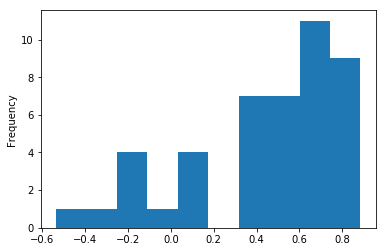

In [23]:
result_params["ar.L1"].plot.hist()

# Let's try forecasting

In [24]:
mean_params = result_params.mean()

In [112]:
data

,id,name,timestamp,status,latitude,longitude,wind_kt,min_pressure_mbar,sea_temp_degc
0,AL012007,ANDREA,2007-05-06 12:00:00,EX,35.5,-74.0,35,1012,22.991250
1,AL012007,ANDREA,2007-05-06 18:00:00,EX,35.0,-73.0,40,1009,21.806250
2,AL012007,ANDREA,2007-05-07 00:00:00,EX,34.3,-71.7,50,1005,21.414999
3,AL012007,ANDREA,2007-05-07 06:00:00,EX,33.3,-72.3,65,998,20.699999
4,AL012007,ANDREA,2007-05-07 12:00:00,EX,32.3,-73.1,65,998,20.180624
5,AL012007,ANDREA,2007-05-07 18:00:00,EX,31.5,-74.0,65,998,21.098125
6,AL012007,ANDREA,2007-05-08 00:00:00,EX,31.0,-74.9,55,1000,21.783125
7,AL012007,ANDREA,2007-05-08 06:00:00,EX,30.7,-76.0,50,1001,21.114374
8,AL012007,ANDREA,2007-05-08 12:00:00,EX,30.4,-77.2,50,1001,23.751875
9,AL012007,ANDREA,2007-05-08 18:00:00,EX,30.4,-77.9,50,1001,24.596874


In [25]:
data[['id', 'name', 'timestamp', 'min_pressure_mbar']]

,id,name,timestamp,min_pressure_mbar
0,AL012007,ANDREA,2007-05-06 12:00:00,1012
1,AL012007,ANDREA,2007-05-06 18:00:00,1009
2,AL012007,ANDREA,2007-05-07 00:00:00,1005
3,AL012007,ANDREA,2007-05-07 06:00:00,998
4,AL012007,ANDREA,2007-05-07 12:00:00,998
5,AL012007,ANDREA,2007-05-07 18:00:00,998
6,AL012007,ANDREA,2007-05-08 00:00:00,1000
7,AL012007,ANDREA,2007-05-08 06:00:00,1001
8,AL012007,ANDREA,2007-05-08 12:00:00,1001
9,AL012007,ANDREA,2007-05-08 18:00:00,1001


In [52]:
hurr_by_name = data.groupby('id')

In [46]:
for name, group in hurr_by_name:
    print(name, group.set_index(pd.DatetimeIndex(group["timestamp"], freq="6H")))

AL012007                            id    name           timestamp status  latitude  \
timestamp                                                                    
2007-05-06 12:00:00  AL012007  ANDREA 2007-05-06 12:00:00     EX      35.5   
2007-05-06 18:00:00  AL012007  ANDREA 2007-05-06 18:00:00     EX      35.0   
2007-05-07 00:00:00  AL012007  ANDREA 2007-05-07 00:00:00     EX      34.3   
2007-05-07 06:00:00  AL012007  ANDREA 2007-05-07 06:00:00     EX      33.3   
2007-05-07 12:00:00  AL012007  ANDREA 2007-05-07 12:00:00     EX      32.3   
2007-05-07 18:00:00  AL012007  ANDREA 2007-05-07 18:00:00     EX      31.5   
2007-05-08 00:00:00  AL012007  ANDREA 2007-05-08 00:00:00     EX      31.0   
2007-05-08 06:00:00  AL012007  ANDREA 2007-05-08 06:00:00     EX      30.7   
2007-05-08 12:00:00  AL012007  ANDREA 2007-05-08 12:00:00     EX      30.4   
2007-05-08 18:00:00  AL012007  ANDREA 2007-05-08 18:00:00     EX      30.4   
2007-05-09 00:00:00  AL012007  ANDREA 2007-05-09 00:00:

ValueError: Inferred frequency None from passed values does not conform to passed frequency 6H

In [38]:
for name, group in hurr_by_name:
    print(name, clean_hur_df(group))

AL012007                            id    name           timestamp status  latitude  \
timestamp                                                                    
2007-05-06 12:00:00  AL012007  ANDREA 2007-05-06 12:00:00     EX      35.5   
2007-05-06 18:00:00  AL012007  ANDREA 2007-05-06 18:00:00     EX      35.0   
2007-05-07 00:00:00  AL012007  ANDREA 2007-05-07 00:00:00     EX      34.3   
2007-05-07 06:00:00  AL012007  ANDREA 2007-05-07 06:00:00     EX      33.3   
2007-05-07 12:00:00  AL012007  ANDREA 2007-05-07 12:00:00     EX      32.3   
2007-05-07 18:00:00  AL012007  ANDREA 2007-05-07 18:00:00     EX      31.5   
2007-05-08 00:00:00  AL012007  ANDREA 2007-05-08 00:00:00     EX      31.0   
2007-05-08 06:00:00  AL012007  ANDREA 2007-05-08 06:00:00     EX      30.7   
2007-05-08 12:00:00  AL012007  ANDREA 2007-05-08 12:00:00     EX      30.4   
2007-05-08 18:00:00  AL012007  ANDREA 2007-05-08 18:00:00     EX      30.4   
2007-05-09 00:00:00  AL012007  ANDREA 2007-05-09 00:00:

ValueError: Inferred frequency None from passed values does not conform to passed frequency 6H

In [55]:
def clean_hur_df(df):
    df = df.set_index(pd.DatetimeIndex(df["timestamp"], freq="6H"))
    return df

In [57]:
data.groupby('id').apply(clean_hur_df)

ValueError: Inferred frequency None from passed values does not conform to passed frequency 6H

In [78]:
# names_list = [name for name in data.groupby('name')]

In [24]:
hurricane_irene = data[data.name == "IRENE"]
hurricane_irene = hurricane_irene.set_index(pd.DatetimeIndex(hurricane_irene["timestamp"], freq="6H"))

In [25]:
hurricane_irene.tail()

,id,name,timestamp,status,latitude,longitude,wind_kt,min_pressure_mbar,sea_temp_degc
timestamp,,,,,,,,,
2011-08-29 00:00:00,AL092011,IRENE,2011-08-29 00:00:00,EX,44.2,-72.1,45,979,NaN
2011-08-29 06:00:00,AL092011,IRENE,2011-08-29 06:00:00,EX,46.5,-69.5,40,983,NaN
2011-08-29 12:00:00,AL092011,IRENE,2011-08-29 12:00:00,EX,49.1,-66.7,40,985,11.97
2011-08-29 18:00:00,AL092011,IRENE,2011-08-29 18:00:00,EX,51.3,-63.8,40,987,NaN
2011-08-30 00:00:00,AL092011,IRENE,2011-08-30 00:00:00,EX,53.0,-60.0,40,991,NaN


In [26]:
irene_mod = sm.tsa.statespace.SARIMAX(hurricane_irene['min_pressure_mbar'],
                                      order=(1, 1, 1),
                                      seasonal_order=(2, 1, 0, 7),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)

irene_results = irene_mod.filter(mean_params)

In [27]:
irene_prediction = irene_results.get_forecast(5)
irene_prediction

In [28]:
irene_prediction

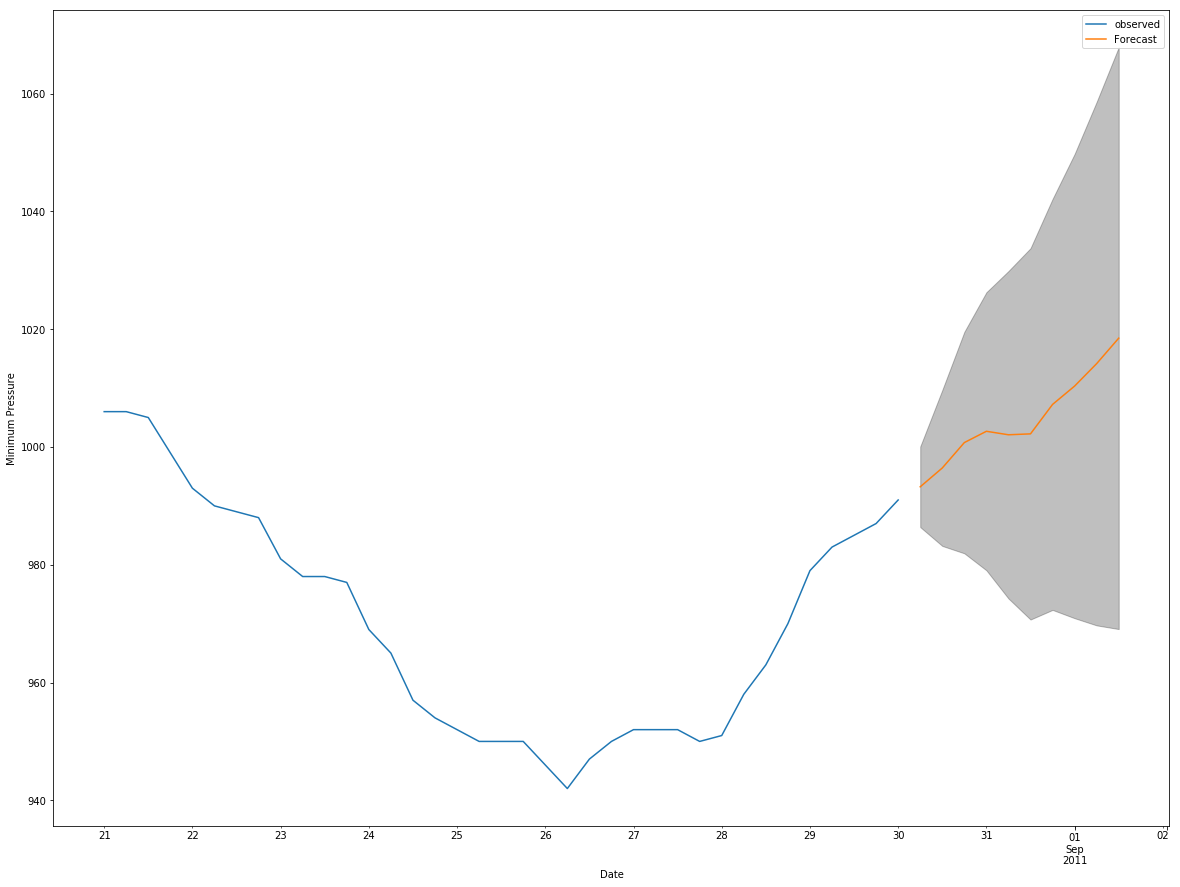

In [29]:
# Get forecast 5 steps ahead in future
irene_prediction = irene_results.get_forecast(steps=10)

# Get confidence intervals of forecasts
irene_prediction_ci = irene_prediction.conf_int()

ax = hurricane_irene['min_pressure_mbar'].plot(label='observed', figsize=(20, 15))
irene_prediction.predicted_mean.plot(ax=ax, label='Forecast')

ax.fill_between(irene_prediction_ci.index,
                irene_prediction_ci.iloc[:, 0],
                irene_prediction_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Minimum Pressure')

plt.legend()
plt.show()

Here's the one-step ahead foreacst, which is ultimately a better notion of forecast because who knows if the hurricane tail ends? It is not just the end. Who knows?  

In [31]:
pred = irene_results.get_prediction(start=pd.to_datetime('2011-08-26'), dynamic=False)
pred_ci = pred.conf_int()

ax = hurricane_irene['min_pressure_mbar']['2011-08-21':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

# ax.fill_between(pred_ci.index,
#                pred_ci.iloc[:, 0],
#                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('MinimumPressure')
plt.legend()

plt.show()

NameError: name 'irene_results' is not defined

Given a one-step ahead forecast for Hurricane Irene, can we compare the forecast to the actual observed values and forecast and generate a MSE to discover which model is best?  

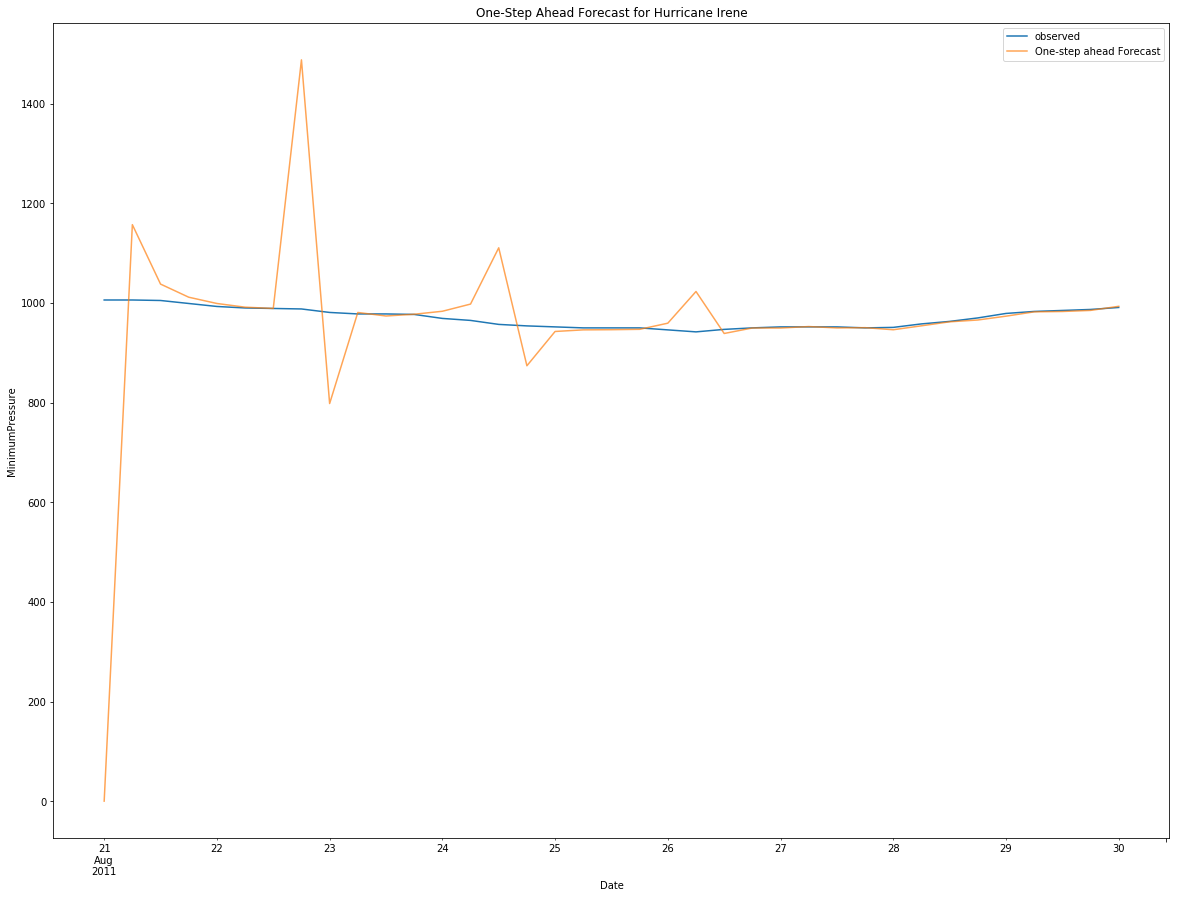

In [73]:
pred = irene_results.get_prediction(start=pd.to_datetime('2011-08-21'), dynamic=False)
pred_ci = pred.conf_int()

ax = hurricane_irene['min_pressure_mbar']['2011-08-21':].plot(label='observed', figsize=(20, 15))
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.set_xlabel('Date')
ax.set_ylabel('MinimumPressure')
plt.title("One-Step Ahead Forecast for Hurricane Irene")
plt.legend()

plt.show()

In [ ]:
# pred = irene_results.get_prediction(start=pd.to_datetime('2011-08-21'), dynamic=False)
# pred_ci = pred.conf_int()

# ax = hurricane_irene['min_pressure_mbar']['2011-08-21':].plot(label='observed', figsize=(20, 15))
# pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

# ax.set_xlabel('Date')
# ax.set_ylabel('MinimumPressure')
# plt.title("One-Step Ahead Forecast for Hurricane Irene")
# plt.legend()

# plt.show()

In [72]:
y_forecasted = pred.predicted_mean
# y_forecasted = irene_results.get_prediction(start=pd.to_datetime('2011-08-21'), dynamic=False)
y_truth = hurricane_irene['min_pressure_mbar']['2011-08-21':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 36704.38


Great! Now that I have MSE for one hurricane, how can I apply this to ALL the hurricanes? And once I get the MSE for all hurricanes, should I just add it up? Okay, we'll just add them up because we only care comparatively which model is better relative to each other -- not care too much about the interpretation.  